# Problem Set 8, Part One: Due Thursday, March 27 by 8am Eastern Daylight Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

**NOTE**: For the problems on this homework, you should use the percentiles contained in the tables in Conover or elsewhere to determine a range in which a $p$-value falls (e.g., if the statistic is between the 90th and 95th percentiles of the null distributions, $0.05<p<0.10$.

### Conover Problems on Lillefors Tests

#### Exercise 6.2.2:

Fifteen engineering freshmen had achievement scores as follows.

<table>
<tr><td>481</td><td>620</td><td>642</td><td>515</td><td>740</td></tr>
<tr><td>562</td><td>395</td><td>615</td><td>596</td><td>618</td></tr>
<tr><td>525</td><td>584</td><td>540</td><td>580</td><td>598</td></tr>
</table>

Test for normality using the Lilliefors test.

$H_0$: $F(x)=F^*(x)$

$H_1$: $F(x)\ne F^*(x)$

$T = 0.5981$

$p$-value  $= 0.51147$

Since $0.51147 > 0.05$, we do no not have sufficent evidence to reject $H_0$.

I couldn't find the table :(

In [3]:
x_i = np.array([481, 620, 642, 515, 740, 562, 395, 615, 596, 618, 525, 584, 540, 580, 598])
n = len(x_i); xbar = np.mean(x_i); s = np.std(x_i, ddof=1)

In [4]:
x_i.sort(); Fhatp_i = np.arange(n)/n; Fhatm_i = (1+np.arange(n))/n
stardist = stats.norm(loc=xbar,scale=s); Fstar_i = stardist.cdf(x_i)
np.set_printoptions(threshold=20); Fhatp_i, Fhatm_i

(array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333]),
 array([0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333,
        0.4       , 0.46666667, 0.53333333, 0.6       , 0.66666667,
        0.73333333, 0.8       , 0.86666667, 0.93333333, 1.        ]))

In [5]:
Tp = max(Fstar_i-Fhatp_i); Tm = max(Fhatm_i-Fstar_i); Tp, Tm

(0.13000204182445418, 0.14669852493073687)

In [6]:
z_i = (x_i - xbar)/s; Fstarz_i = stats.norm.cdf(z_i); max(Fstarz_i-Fhatp_i), max(Fhatm_i-Fstarz_i)

(0.13000204182445418, 0.14669852493073687)

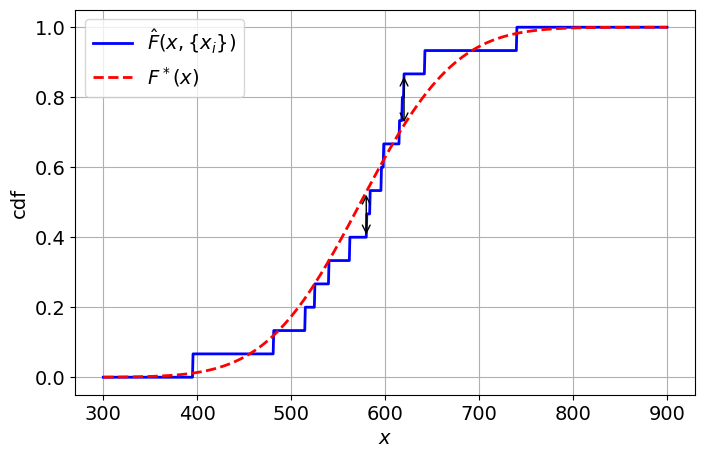

In [7]:
x_x = np.linspace(300,900,1000); Fhat_x = np.mean(x_i[None,:] <= x_x[:,None],axis=-1); Fstar_x = stardist.cdf(x_x)
plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$'); plt.plot(x_x,Fstar_x,'r--',lw=2,label=r'$F^*(x)$');
xp = np.argmax(Fstar_x-Fhat_x); xm = np.argmax(Fhat_x-Fstar_x)
plt.annotate('',xy=(x_x[xp],Fstar_x[xp]),xycoords='data',xytext=(x_x[xp],Fhat_x[xp]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.annotate('',xy=(x_x[xm],Fstar_x[xm]),xycoords='data',xytext=(x_x[xm],Fhat_x[xm]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();

In [8]:
np.random.seed(20230327); Nmonte = 10**5; x_Ii = stats.norm.rvs(size=(Nmonte,n)); x_Ii.sort(axis=-1);
xbar_I = np.mean(x_Ii,axis=-1); s_I = np.std(x_Ii,axis=-1,ddof=1); Fstar_Ii = stats.norm.cdf((x_Ii-xbar_I[:,None])/s_I[:,None])
Tp_I = np.max(Fstar_Ii-Fhatp_i[None,:],axis=-1); Tm_I = np.max(Fhatm_i[None,:]-Fstar_Ii,axis=-1)
print(np.mean(np.maximum(Tp_I,Tm_I)>=max(Tp,Tm)))

0.51147


In [9]:
dn = np.sqrt(n) - 0.01 + 0.83 / np.sqrt(n)
t = max(Tp,Tm) * dn

print(t, dn)

0.5981321976203 4.077288424697561


#### Followup:

Evaluate the (one-sample) Cramér-von Mises and Anderson-Darling
statistics on the data for Exercise 6.2.2, and constrain the $p$-value using any available tables.

$H_0$: $F(x)=F^*(x)$

$H_1$: $F(x)\ne F^*(x)$

$T = 0.05642$

$p$-value  $= 0.41372$

Since $0.41372 > 0.05$, we do no not have sufficent evidence to reject $H_0$.

$0.01 < p < 0.05$

In [10]:
i_i = np.arange(1,n+1); TCvM = 1./(12.*n) + np.sum(((2*i_i-1)/(2.*n)-Fstar_i)**2); TCvM

0.05642282358389745

In [11]:
TCvM_I = 1./(12.*n) + np.sum(((2*i_i[None,:]-1)/(2.*n)-Fstar_Ii)**2,axis=-1); np.mean(TCvM_I>=TCvM), np.sum(TCvM_I>=TCvM)

(0.41372, 41372)

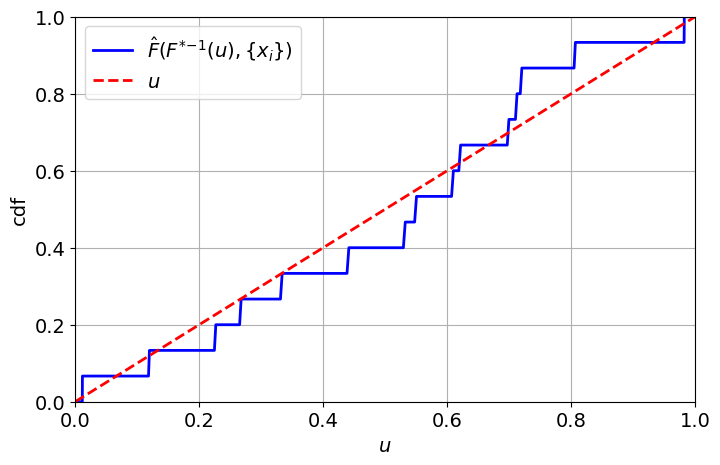

In [12]:
plt.plot(Fstar_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}({F^{*}}^{-1}(u),\{x_i\})$');
plt.plot(Fstar_x,Fstar_x,'r--',lw=2,label=r'$u$');
plt.xlim(0,1);plt.ylim(0,1);plt.xlabel(r'$u$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();

In [13]:
# constrain the p-value
for T in (0.079056472, 0.087549478, 0.099057473, 0.1191476, 0.1690551):
    print('P(TCvM>=%g)=%g'%(T,np.mean(TCvM_I>=T)))

P(TCvM>=0.0790565)=0.20154
P(TCvM>=0.0875495)=0.15341
P(TCvM>=0.0990575)=0.10627
P(TCvM>=0.119148)=0.05478
P(TCvM>=0.169055)=0.01143


#### Exercise 6.2.6:

Twenty accidents occurred along a particular stretch of interstate
highway one month. The nineteen distances between accidents, in miles,
are as follows.

<table>
<tr>
<td>0.3</td><td>6.1</td><td>4.3</td><td>3.3</td><td>1.9</td></tr>
<tr><td>4.8</td><td>0.3</td><td>1.2</td><td>0.8</td><td>10.3</td></tr>
<tr><td>1.2</td><td>0.1</td><td>10.0</td><td>1.6</td><td>27.6</td></tr>
<tr><td>12.0</td><td>14.2</td><td>19.7</td><td>15.5</td></tr>
</table>

Do the accidents appear to be distributed at random along the highway?

\[Evaluate with the appropriate goodness-of-fit test, and constrain the $p$-value.\]

$H_0$: 

$H_1$:

$T = 0.19650$

$p$-value  $= 0.05015$

Since $0.05015 > 0.05$, we do no not have sufficent evidence to reject $H_0$.

I couldn't find the table :(

In [14]:
x_i = np.array(
    [0.3, 6.1, 4.3, 3.3, 1.9, 4.8, 0.3, 1.2, 0.8, 10.3, 
     1.2, 0.1, 10.0, 1.6, 27.6, 12.0, 14.2, 19.7, 15.5]
)
n = len(x_i); xbar = np.mean(x_i); s = np.std(x_i, ddof=1)
alpha = np.array([0.01, 0.05, 0.1, 0.15, 0.2])
critical_values = np.array([0.235, 0.195, 0.179, 0.169, 0.163])

In [15]:
x_i.sort(); Fhatp_i = np.arange(n)/n; Fhatm_i = (1+np.arange(n))/n
stardist = stats.norm(loc=xbar,scale=s); Fstar_i = stardist.cdf(x_i)
np.set_printoptions(threshold=20); Fhatp_i, Fhatm_i

(array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842]),
 array([0.05263158, 0.10526316, 0.15789474, 0.21052632, 0.26315789,
        0.31578947, 0.36842105, 0.42105263, 0.47368421, 0.52631579,
        0.57894737, 0.63157895, 0.68421053, 0.73684211, 0.78947368,
        0.84210526, 0.89473684, 0.94736842, 1.        ]))

In [16]:
Tp = max(Fstar_i-Fhatp_i); Tm = max(Fhatm_i-Fstar_i); Tp, Tm

(0.18245882783514533, 0.19650256720568826)

In [17]:
z_i = (x_i - xbar)/s; Fstarz_i = stats.norm.cdf(z_i); max(Fstarz_i-Fhatp_i), max(Fhatm_i-Fstarz_i)

(0.18245882783514533, 0.19650256720568826)

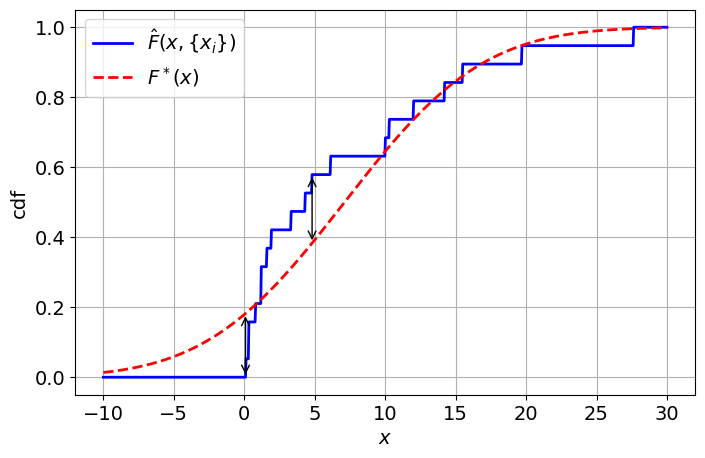

In [18]:
x_x = np.linspace(-10,30,1000); Fhat_x = np.mean(x_i[None,:] <= x_x[:,None],axis=-1); Fstar_x = stardist.cdf(x_x)
plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$'); plt.plot(x_x,Fstar_x,'r--',lw=2,label=r'$F^*(x)$');
xp = np.argmax(Fstar_x-Fhat_x); xm = np.argmax(Fhat_x-Fstar_x)
plt.annotate('',xy=(x_x[xp],Fstar_x[xp]),xycoords='data',xytext=(x_x[xp],Fhat_x[xp]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.annotate('',xy=(x_x[xm],Fstar_x[xm]),xycoords='data',xytext=(x_x[xm],Fhat_x[xm]),textcoords='data',arrowprops=dict(arrowstyle='<->'));
plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();

In [19]:
np.random.seed(20230327); Nmonte = 10**5; x_Ii = stats.norm.rvs(size=(Nmonte,n)); x_Ii.sort(axis=-1);
xbar_I = np.mean(x_Ii,axis=-1); s_I = np.std(x_Ii,axis=-1,ddof=1); Fstar_Ii = stats.norm.cdf((x_Ii-xbar_I[:,None])/s_I[:,None])
Tp_I = np.max(Fstar_Ii-Fhatp_i[None,:],axis=-1); Tm_I = np.max(Fhatm_i[None,:]-Fstar_Ii,axis=-1)
print(np.mean(np.maximum(Tp_I,Tm_I)>=max(Tp,Tm)))

0.05015


In [20]:
dn = np.sqrt(n) - 0.01 + 0.83 / np.sqrt(n)
t = max(Tp,Tm) * dn

print(t, dn)

0.8919868548740901 4.53931400265324


### Conover Problems on Two-Sample K-S Tests

#### Exercise 6.3.2:

A random sample of five sixth-grade boys in one section of town were
given a literacy test with the following results; 82, 74, 87, 86, 75. A
random sample of eight sixth-grade boys from a different section of town
were given the same literacy test with these scores resulting: 88, 77,
91, 88, 94, 93, 83, 94. Is there a difference in literacy, as measured
by this test, in the two populations of sixth-grade boys? (Use the
Smirnov test).

$H_0: F_X(t) = F_Y(t)$

$H_1: F_X(t) \neq F_Y(t)$ 

$T = 0.75$

$p$-value  $= 0.04195$

Since $00.04195 < 0.05$, we have sufficent evidence to reject $H_0$.

In [21]:
x_i = np.array([82, 74, 87, 86, 75])
y_j = np.array([88, 77, 91, 88, 94, 93, 83, 94]) + np.random.rand(8)*(1e-5) # deal with ties

In [22]:
n = len(x_i); m = len(y_j); N=n+m; x_i.sort(); y_j.sort(); x_i, y_j

(array([74, 75, 82, 86, 87]),
 array([77.00000311, 83.00000533, 88.00000625, 88.00000905, 91.00000459,
        93.00000096, 94.00000188, 94.00000336]))

In [23]:
Fxhat_i = (1.+np.arange(n))/n; Fyhat_j = (1.+np.arange(m))/m; X_k = np.concatenate((x_i,y_j)); X_k.sort()

In [24]:
Fxhat_k = np.mean(x_i[None,:] <= X_k[:,None], axis=-1); Fyhat_k = np.mean(y_j[None,:] <= X_k[:,None], axis=-1)

In [25]:
print('For        X <= %.2f, Fxhat(X)-Fyhat(X) = 0-0 = 0' % X_k[0])
for k in range(1,N):
    print('For %.2f < X <= %.2f, Fxhat(X)-Fyhat(X) = %g-%g = %g'
          % (X_k[k-1],X_k[k],Fxhat_k[k-1],Fyhat_k[k-1],Fxhat_k[k-1]-Fyhat_k[k-1]))
print('For %g < X           , Fxhat(X)-Fyhat(X) = 1-1 = 0' % X_k[-1])

For        X <= 74.00, Fxhat(X)-Fyhat(X) = 0-0 = 0
For 74.00 < X <= 75.00, Fxhat(X)-Fyhat(X) = 0.2-0 = 0.2
For 75.00 < X <= 77.00, Fxhat(X)-Fyhat(X) = 0.4-0 = 0.4
For 77.00 < X <= 82.00, Fxhat(X)-Fyhat(X) = 0.4-0.125 = 0.275
For 82.00 < X <= 83.00, Fxhat(X)-Fyhat(X) = 0.6-0.125 = 0.475
For 83.00 < X <= 86.00, Fxhat(X)-Fyhat(X) = 0.6-0.25 = 0.35
For 86.00 < X <= 87.00, Fxhat(X)-Fyhat(X) = 0.8-0.25 = 0.55
For 87.00 < X <= 88.00, Fxhat(X)-Fyhat(X) = 1-0.25 = 0.75
For 88.00 < X <= 88.00, Fxhat(X)-Fyhat(X) = 1-0.375 = 0.625
For 88.00 < X <= 91.00, Fxhat(X)-Fyhat(X) = 1-0.5 = 0.5
For 91.00 < X <= 93.00, Fxhat(X)-Fyhat(X) = 1-0.625 = 0.375
For 93.00 < X <= 94.00, Fxhat(X)-Fyhat(X) = 1-0.75 = 0.25
For 94.00 < X <= 94.00, Fxhat(X)-Fyhat(X) = 1-0.875 = 0.125
For 94 < X           , Fxhat(X)-Fyhat(X) = 1-1 = 0


In [26]:
Tp = max(Fxhat_k-Fyhat_k); Tm = max(Fyhat_k-Fxhat_k); T=max(Tp,Tm); Tp, Tm, T

(0.75, 0.0, 0.75)

$T^{+}=\max_k \left(\hat{F}_x(X^{(k)})-\hat{F}_y(X^{(k)})\right)=\frac{3}{4}$ and $T^{-}=\max_k \left(\hat{F}_y(X^{(k)})-\hat{F}_x(X^{(k)})\right)=0$

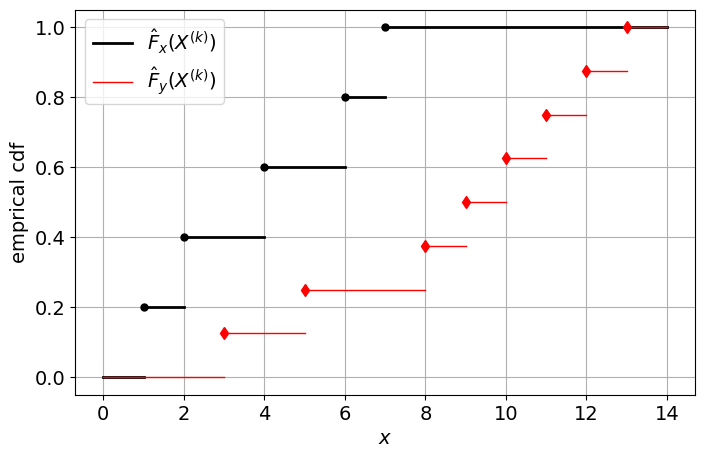

In [27]:
Rxy_k = stats.rankdata(np.concatenate((x_i,y_j))); Rx_i=Rxy_k[:n]; Ry_j=Rxy_k[n:]; RX_k = np.sort(Rxy_k)
plt.plot(Rx_i,Fxhat_i,'k.',ms=10);plt.plot([0,Rx_i[0]],[0,0],'k-',lw=2,label=r'$\hat{F}_x(X^{(k)})$');plt.plot([Rx_i[-1],N+1],[1,1],'k-',lw=2);plt.plot(Ry_j,Fyhat_j,'rd');
for i in range(n-1): plt.plot(Rx_i[i:i+2],[Fxhat_i[i],Fxhat_i[i]],'k-',lw=2);
for j in range(m-1): plt.plot(Ry_j[j:j+2],[Fyhat_j[j],Fyhat_j[j]],'r-',lw=1);
plt.plot([0,Ry_j[0]],[0,0],'r-',lw=1,label=r'$\hat{F}_y(X^{(k)})$');plt.plot([Ry_j[-1],N+1],[1,1],'r-',lw=1);
plt.legend();plt.xlabel(r'$x$');plt.ylabel(r'emprical cdf')
plt.grid();

In [28]:
import itertools;xranks_Ii = np.array([xranks_i for xranks_i in itertools.combinations(RX_k,n)]); xranks_Ii

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  2.,  3.,  4.,  6.],
       [ 1.,  2.,  3.,  4.,  7.],
       ...,
       [ 8.,  9., 11., 12., 13.],
       [ 8., 10., 11., 12., 13.],
       [ 9., 10., 11., 12., 13.]])

In [29]:
yranks_Ij = np.array([np.setdiff1d(RX_k,xranks_i) for xranks_i in xranks_Ii]); xranks_Ii, yranks_Ij

(array([[ 1.,  2.,  3.,  4.,  5.],
        [ 1.,  2.,  3.,  4.,  6.],
        [ 1.,  2.,  3.,  4.,  7.],
        ...,
        [ 8.,  9., 11., 12., 13.],
        [ 8., 10., 11., 12., 13.],
        [ 9., 10., 11., 12., 13.]]),
 array([[ 6.,  7.,  8., ..., 11., 12., 13.],
        [ 5.,  7.,  8., ..., 11., 12., 13.],
        [ 5.,  6.,  8., ..., 11., 12., 13.],
        ...,
        [ 1.,  2.,  3., ...,  6.,  7., 10.],
        [ 1.,  2.,  3., ...,  6.,  7.,  9.],
        [ 1.,  2.,  3., ...,  6.,  7.,  8.]]))

In [30]:
Fxhat_Ik = np.mean(xranks_Ii[:,None,:]<=RX_k[None,:,None],axis=-1); Fxhat_Ik

array([[0.2, 0.4, 0.6, ..., 1. , 1. , 1. ],
       [0.2, 0.4, 0.6, ..., 1. , 1. , 1. ],
       [0.2, 0.4, 0.6, ..., 1. , 1. , 1. ],
       ...,
       [0. , 0. , 0. , ..., 0.6, 0.8, 1. ],
       [0. , 0. , 0. , ..., 0.6, 0.8, 1. ],
       [0. , 0. , 0. , ..., 0.6, 0.8, 1. ]])

In [31]:
Fyhat_Ik = np.array([np.mean(yranks_j[None,:]<=RX_k[:,None], axis=-1) for yranks_j in yranks_Ij]); Fyhat_Ik

array([[0.   , 0.   , 0.   , ..., 0.75 , 0.875, 1.   ],
       [0.   , 0.   , 0.   , ..., 0.75 , 0.875, 1.   ],
       [0.   , 0.   , 0.   , ..., 0.75 , 0.875, 1.   ],
       ...,
       [0.125, 0.25 , 0.375, ..., 1.   , 1.   , 1.   ],
       [0.125, 0.25 , 0.375, ..., 1.   , 1.   , 1.   ],
       [0.125, 0.25 , 0.375, ..., 1.   , 1.   , 1.   ]])

In [32]:
Tp_I = np.max(Fxhat_Ik-Fyhat_Ik,axis=-1);Tm_I = np.max(Fyhat_Ik-Fxhat_Ik,axis=-1);
T_I = np.max(np.abs(Fxhat_Ik-Fyhat_Ik),axis=-1); T_I

array([1.   , 0.875, 0.8  , ..., 0.875, 0.875, 1.   ])

In [33]:
Tp_I = np.round(Tp_I,decimals=8); Tm_I = np.round(Tm_I,decimals=8); T_I = np.maximum(Tp_I,Tm_I); np.unique(T_I)

array([0.15 , 0.175, 0.2  , ..., 0.8  , 0.875, 1.   ])

In [34]:
np.sort(T_I)

array([0.15 , 0.175, 0.175, ..., 0.875, 1.   , 1.   ])

In [35]:
np.mean(T_I>=T)

0.04195804195804196

#### Exercise 6.3.3:

Use the \[two-sample\] Cramér-von Mises test on the data in Exercise 2
and compare results with the Smirnov test.

$H_0: F_X(t) = F_Y(t)$

$H_1: F_X(t) \neq F_Y(t)$ 

$T = 0.55576$

$p$-value  $= 0.02641$

Since $0.02641 < 0.05$, we have sufficent evidence to reject $H_0$.

In [36]:
TCvM = n*m/N**2 * np.sum((Fxhat_k-Fyhat_k)**2); TCvM

0.5557692307692308

In [37]:
TCvM_I = n*m/N**2 * np.sum((Fxhat_Ik-Fyhat_Ik)**2,axis=-1); TCvM_I

array([1.03846154, 0.90961538, 0.8       , ..., 0.81153846, 0.90961538,
       1.03846154])

In [38]:
TCvM_I = np.round(TCvM_I,8); TCvM = np.round(TCvM,8); TCvM_I, TCvM

(array([1.03846154, 0.90961538, 0.8       , ..., 0.81153846, 0.90961538,
        1.03846154]),
 0.55576923)

In [39]:
np.mean(TCvM_I >= TCvM)

0.02641802641802642

#### Followup:

Use the two-sample Anderson-Darling test on the data from exercise
6.3.2. Note that the critical values for the test are tabulated in
Pettitt, *Biometrika*, **63**, 161 (1975).
<https://www.jstor.org/stable/2335097>

$H_0: F_X(t) = F_Y(t)$

$H_1: F_X(t) \neq F_Y(t)$ 

$T = 2.74370$

$p$-value  $= 0.03108$

Since $0.03108 < 0.05$, we have sufficent evidence to reject $H_0$.

In [40]:
k_k = 1 + np.arange(N); k_k, N-k_k

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0]))

In [41]:
A2 = n*m*np.sum( (Fxhat_k[:-1]-Fyhat_k[:-1])**2 / (k_k[:-1]*(N-k_k[:-1])) ); A2

2.7437022005772

In [42]:
A2_I = n*m*np.sum( (Fxhat_Ik[:,:-1]-Fyhat_Ik[:,:-1])**2 / (k_k[None,:-1]*(N-k_k[None,:-1])), axis=-1 ); A2_I

array([4.90185696, 4.35748196, 3.91641053, ..., 3.8970653 , 4.35748196,
       4.90185696])

In [43]:
A2 = np.round(A2,8); A2_I = np.round(A2_I,8); np.mean(A2_I>=A2)

0.03108003108003108